In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
#data_cleaned_total=pd.read_csv("df_final_experiment_web_data_demo.csv")

In [2]:
path_dclean = r"C:\Users\tania\Documents\FormationDataIronhack\Cours_semaine5\Projectweek5\Vanguard\data\clean\df_final_experiment_web_data_demo.csv"
data_cleaned_total=pd.read_csv(path_dclean)

In [3]:
data_cleaned_total.head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5,64,79.0,U,2,189023.86,1,4
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5,64,79.0,U,2,189023.86,1,4
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5,64,79.0,U,2,189023.86,1,4
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5,64,79.0,U,2,189023.86,1,4
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5,64,79.0,U,2,189023.86,1,4


In [4]:
data_cleaned_total.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [13]:
#correlation matrix considering genders
# List of columns to encode
category = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
df_selected_columns = data_cleaned_total[category].copy()
# One-Hot Encoding the categorical variable
df_encoded = pd.get_dummies(df_selected_columns,'clnt_age')

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Print the correlation matrix
print(correlation_matrix)

                  clnt_tenure_yr  clnt_tenure_mnth  clnt_age  num_accts  \
clnt_tenure_yr          1.000000          0.998969  0.311362   0.158726   
clnt_tenure_mnth        0.998969          1.000000  0.311655   0.158262   
clnt_age                0.311362          0.311655  1.000000  -0.014992   
num_accts               0.158726          0.158262 -0.014992   1.000000   
bal                     0.197144          0.196372  0.201108   0.264199   
calls_6_mnth            0.061426          0.059330  0.076143   0.238228   
logons_6_mnth           0.066618          0.064529  0.084943   0.244441   
clnt_age_F              0.272467          0.273000  0.137400  -0.039290   
clnt_age_M              0.293174          0.292260  0.100221   0.107456   
clnt_age_U             -0.561778         -0.561393 -0.235833  -0.068375   

                       bal  calls_6_mnth  logons_6_mnth  clnt_age_F  \
clnt_tenure_yr    0.197144      0.061426       0.066618    0.272467   
clnt_tenure_mnth  0.196372      

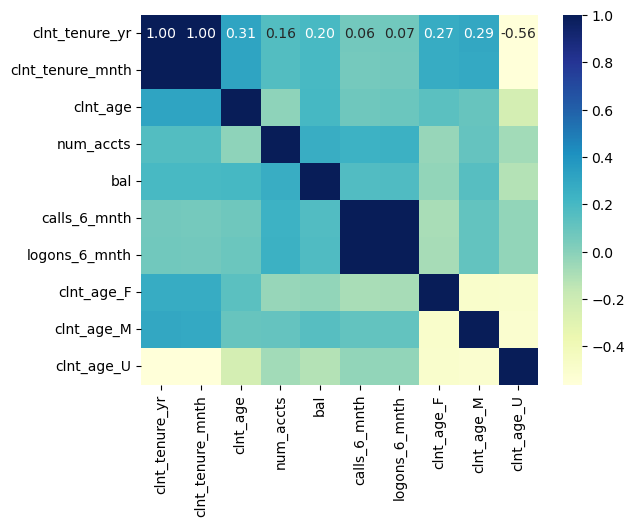

In [17]:
#sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt="d");
#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()

In [10]:
#calcul des stat
def calc_stat(df, columns):
    # Initialize an empty list to store the stats for each column
    stats_list = []
    
    # Loop through each column in the list
    for column in columns:
        # Calculate the required statistics
        mean_column = df[column].mean()
        median_column = df[column].median()
        mode_column = df[column].mode().iloc[0]
        var_column = df[column].var()
        std_column = df[column].std()
        range_column = df[column].max() - df[column].min()
        quantiles_column = df[column].quantile([0.25, 0.5, 0.75]).to_list()
        
        # Append the results to the stats_list
        stats_list.append({
            'Column': column,
            'Mean': mean_column,
            'Median': median_column,
            'Mode': mode_column,
            'Variance': var_column,
            'Standard Deviation': std_column,
            'Range': range_column,
            '25th Percentile': quantiles_column[0],
            '50th Percentile': quantiles_column[1],
            '75th Percentile': quantiles_column[2]
        })

    # Convert the stats_list to a DataFrame for better presentation
    stats_df = pd.DataFrame(stats_list)
    
    return stats_df

In [12]:
calc_stat(data_cleaned_total,['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'])

,Column,Mean,Median,Mode,Variance,Standard Deviation,Range,25th Percentile,50th Percentile,75th Percentile
0,clnt_tenure_yr,12.171724,11.00,6.00,4.845018e+01,6.960616,55.00,6.00,11.00,16.0
1,clnt_tenure_mnth,152.079591,137.00,58.00,6.919731e+03,83.184922,669.00,82.00,137.00,193.0
2,clnt_age,48.528303,50.00,58.50,2.445018e+02,15.636554,79.00,34.50,50.00,61.0
3,num_accts,2.261377,2.00,2.00,2.938308e-01,0.542062,7.00,2.00,2.00,2.0
4,bal,160798.035054,69090.05,87107.79,1.161872e+11,340862.465069,16296250.71,41033.59,69090.05,151161.7
5,calls_6_mnth,3.230104,3.00,6.00,4.815487e+00,2.194422,6.00,1.00,3.00,6.0
6,logons_6_mnth,6.267389,6.00,9.00,4.763518e+00,2.182548,9.00,4.00,6.00,9.0
